# [TMDB 5000 Movies Project - Group 28]






## Introduction



The Movie DataBase which has shortened TMDb is a database that includes movies and TV series from all over the world. Since 2008 each data of TMDb collected  piece by piece and builded by the members of a community. Thus, the variation of his data is unmatched. Because of the variation and reliability of data, TMDb is chosen as a dataset. One of the other aspects of TMDB is the size of the data. Since 2008 over 200.000 developers contribute to the dataset  annually. The other important property of TMDb is multi-nationality of the dataset. Beneath the extensive regional data it also supports 39 different languages and is used by over 180 countries. The reliability of the data set comes  from a number of uses in years. The service is used by millions of people while they process over 3 billion requests. From TMDb the chosen dataset is TMDB 5000 Movies dataset because TMDB 5000 Movies data set gives us brief and specific information about only the movies. It includes data like popularity, budget, genre etc. This dataset gives us an opportunity to understand correlations between genres, producers and financial situations of a movie.

### Problem Definition



The main aim of this project is answering the question “What is the average popularity for a movie in order to make a gain from box office?”. To solve this problem we need to foresee the average popularity of a movie needs to have more revenue than budget based on its genre. Because the popularity of each genre can vary.


### Utilized Datasets



Chosen dataset is “The TMDB 5000 Movies Dataset”. 
This dataset includes the budgets, multiple genres with IDs, homepage links, keywords, original language and title information, a little overview of the plot, how popular the movie was, which company produced it, and where it was produced, when it was released, how much money it made, its runtime, languages spoken in the movie, its publication status, tagline and title with some voting information. 
Using this dataset’s relational data of a movie’s budget, genre and popularity, we have theorized that we can somewhat accurately guess what the revenue is going to be. 
Link of dataset: https://www.kaggle.com/tmdb/tmdb-movie-metadata?select=tmdb_5000_movies.csv


## Data Exploration



In [ ]:
from google.colab import drive
drive.mount("./drive")

path_prefix = "./drive/My Drive"

Mounted at ./drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import join


fname = "tmdb_5000_movies.csv"
df = pd.read_csv(join(path_prefix, fname))
print(df.shape)
df.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


  Very first thing we have to do to start working on oour dataset to see are there any missing NA data. After we implemented pandas it is too easy to see the distributions of NA values in our dataset. Consequently we saw that even if there are many NA values in dataset, those NA values are not significantly effects our dataset except one missing data in release_date column. We are going to dropp that row which has missing data in releas_date column. Hence we will mainly work on “budget”, ”genres”, ”popularity”,"year" and  ”revenue” columns there is no need to drop those NA values in our data exploration part of the project.

In [ ]:
print(df.isna().sum())

df.dropna(subset=["release_date"], inplace = True)
df = df.reset_index(drop=True)
print("Missing values in release_date column: ",df.release_date.isna().sum())


budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64
Missing values in release_date column:  0


By using df.describe method we are able to see many feature of our columns. For the start of our exploration, it is a good way to know our dataset’s values. By this way we figured out that there are 0 values in some of the features. Even if df.describe method can give us a brief information we should use more methods to understand and evaluate our dataset.

In [ ]:
df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.802000e+03,4802.000000,4802.000000,4.802000e+03,4800.000000,4802.000000,4802.000000
mean,2.905109e+07,57098.234902,21.496776,8.227777e+07,106.898125,6.093440,690.361724
std,4.072447e+07,88581.302370,31.818451,1.628697e+08,22.561593,1.191496,1234.674268
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9013.750000,4.671734,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14626.500000,12.924931,1.917498e+07,103.000000,6.200000,235.500000
75%,4.000000e+07,58589.750000,28.332017,9.291920e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


One thing that we have concerned about our dataset was the 0 values in budget and revenue columns because both of those data are essential for our machine learning model. By the help of our code, we found out that there are 889 row which has 0 in both budget and revenue column. 

Now we must decide that how should we handle with those values. Firstly, we have tried to find a better version of that dataset which have updated. As we searched in Kaggle there are no version which those data are filled right. One other choice was to drop all those values, but this way would cause a huge data lose in our dataset. So, we have decided to fill those values by the median of dataset.


In [ ]:
count = 0
for index,row in df.iterrows():
    if (row.budget == 0 and row.revenue == 0):
      count += 1

count

889

First thing that we had to do was to create a copy of our dataset. The reason of this to find median of the dataset right. Hence those 0 values are not NA values, it would corrupt the median value because of they would be included to median calculation. In copy dataset df_0, after we dropped 0 values, we have found true median value of revenue and budget which does not include 0. 

In [ ]:
df_0 = df.copy()

for index,row in df_0.iterrows():
    if (row.budget == 0 and row.revenue == 0):
      df_0.drop(index, inplace=True)

df_0.shape
print(df_0.budget.median())
print(df_0.revenue.median())

20000000.0
36642838.0


After we replaced 0 values with median of pure data, we can see that there are no 0 values.

In [ ]:
df.budget.replace(0,df_0.budget.median(),inplace=True)
df.revenue.replace(0,df_0.revenue.median(),inplace=True)

count = 0
for index,row in df.iterrows():
    if (row.budget == 0 and row.revenue == 0):
      count += 1

count

0

Before we start to explore our data we need to add a new column to see released year of the movie and profits of the movies. It show us the relation between budget of a movie and its revenue.

Hence our dataset has a wide variaty of release years, it is a good way to see mean profit and mean popularity of each year in a line chart for each year. Also we can relate that chart by the historical events. For example the popularity has one of the lowest period between 1929 and 1933, if you consider that also The Great Depression was in that time period it makes sense that why the popularity was so low. We can see the effects of the economic crisis clearly. So this chart can provide us so many knowledge about this dataset.


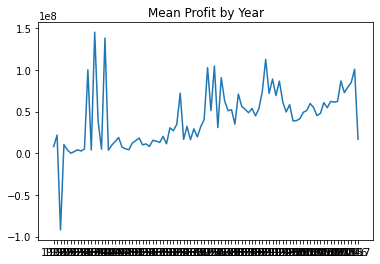

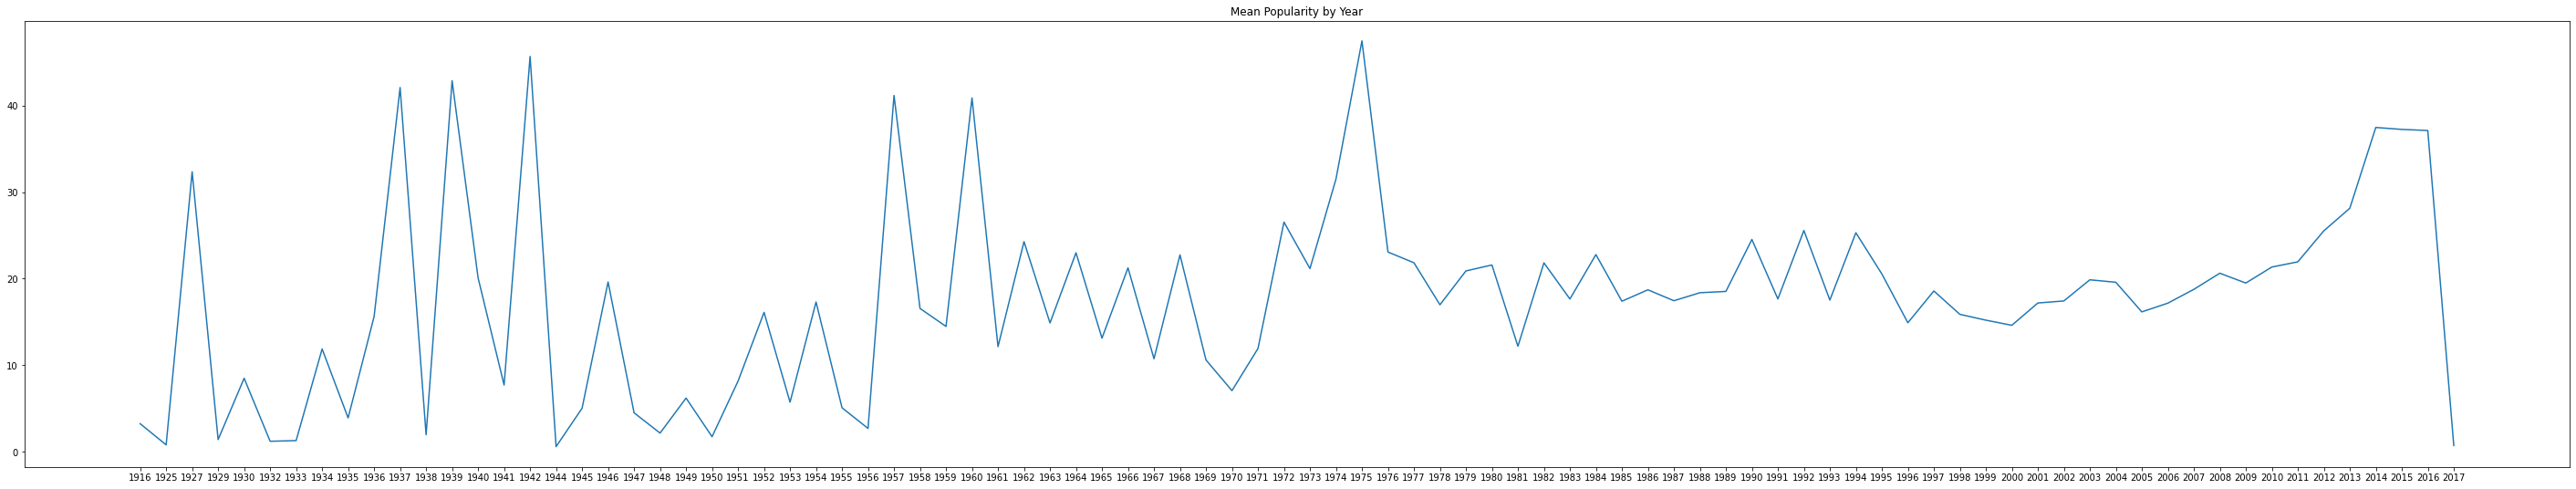

In [ ]:
year = []

for index,row in df.iterrows():
    year.append(row.release_date[0:4])

df["year"] = year
df["profit"] = df["revenue"] - df["budget"]

df["year"] = df.year.astype(int)

df.year.head()
df.groupby("year").profit.mean()

year_set = set(year) 
unique_year = (list(year_set))
unique_year.sort()

x = unique_year
y = df.groupby("year").profit.mean()

plt.plot(x,y)
plt.rcParams["figure.figsize"] = [50,9]
plt.title("Mean Profit by Year")
plt.show()

x = unique_year
y = df.groupby("year").popularity.mean()

plt.plot(x,y)
plt.rcParams["figure.figsize"] = [50,9]
plt.title("Mean Popularity by Year")
plt.show()

  Hence we are usully work on the mathematical values in our dataset it is important to see their corellation by heatmap. It is also is a great way to test our predictios about the corellations about our columns in dataset. Most of the result are as we expected. For example budget and reveneu has a strong correlation.



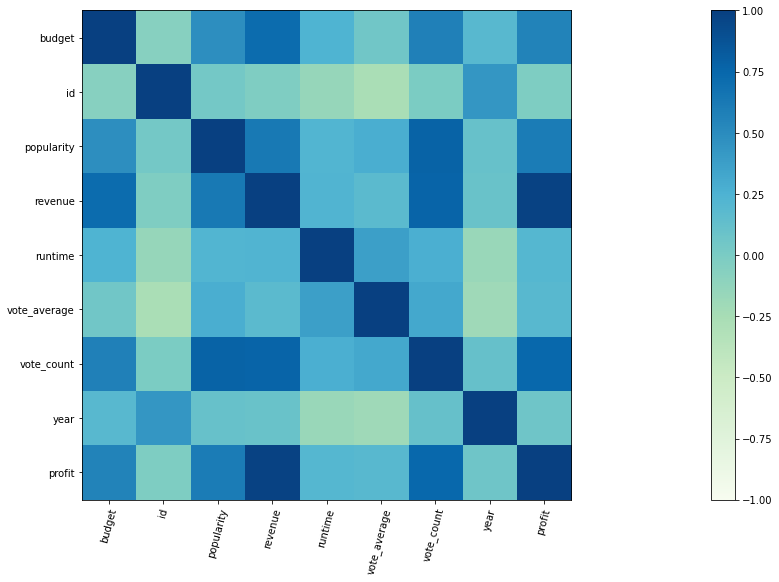

In [ ]:
corrs = df.corr()

plt.imshow(corrs, cmap="GnBu", vmin = -1, vmax = 1)
plt.rcParams["figure.figsize"] = [6,6]
plt.colorbar()
plt.xticks(range(len(corrs)),corrs.columns, rotation=75)
plt.yticks(range(len(corrs)),corrs.index)
plt.show()

To evaluate vote_average and vote_count features, scatter plot is a great way to understand relation of those features. By this way we can see the distribution of each movies average and count according to vote. As you can see in the scatter plot, most of the movies clustered between 5 to 8 vote average and 0 to 2500 vote count. After we saw some outlier values higher than 9 point average and nearly 0 vote count we should dig those data up.

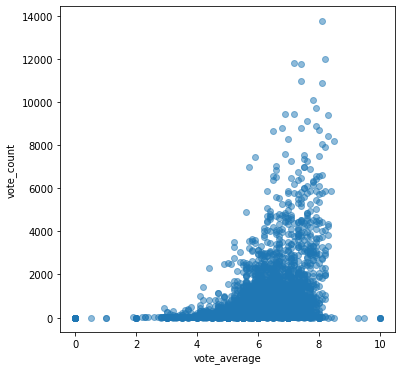

In [ ]:
y = df["vote_count"]
x = df["vote_average"]

plt.scatter(x,y,alpha = 0.5)
plt.ylabel("vote_count")
plt.xlabel("vote_average")
plt.show()

After a little research about those outlier values, we found out there are 6 movies which are over 9 point and there is one movie which has 10-point average and all of them has voted under 2 times. By a little research on IMDB which our dataset has originated, all those movies over 9 point did not has those points in IMDB. Also, there are 64 movies which has never voted. I will explain how to deal with those incorrect values in next parts of our project. 

In [ ]:
max_count = 0
min_count= 0

for index,row in df.iterrows():
    if (row.vote_average >= 9 ):
      print(row.title,row.vote_count)
      max_count += 1
print(max_count)      

for index,row in df.iterrows():
    if (row.vote_average == 0 ):
      min_count += 1
print(min_count)

One Man's Hero 2
Stiff Upper Lips 1
Sardaarji 2
Dancer, Texas Pop. 81 1
Me You and Five Bucks 2
Little Big Top 1
6
62


The results we have faced in previous part pushed me to discover the distribution of vote counts. After a histogram chart that, there are so many movies which has voted under 2000 time approximately. This huge difference between vote counts causes a problem to trust in our dataset. In the next part I will explain how to deal with that problem. 

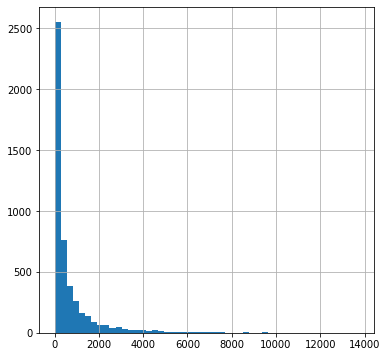

In [ ]:
  df.vote_count.hist(bins = 50)
  plt.show()

Hence our dataset is originated from IMDB lists, after the time that this dataset has formed many data may have changed. So, even if we can change outliers we have faced, there may be a lot of data which has to be change. Hence there are around 5000 data, we can not be sure the correctness of all data. 

The solution we have found about this situation is to find total vote points of each movie. By multiplying vote count and vote average we can see the total vote score. Even if a movie had maximum point by one vote as in “Dancer, Texas Pop. 81” case, other movies which have voted more than that movie can get higher score.

After we formed a new sum_vote column, we printed a bar chart to see 10 movies got highest scores. The results we observed has satisfied us because of the movies that we saw as our results. All those movies in chart has high vote average in IMDB lists. We believed that we have found a solution better than losing many data row while we are trying to eliminate outlier rows.


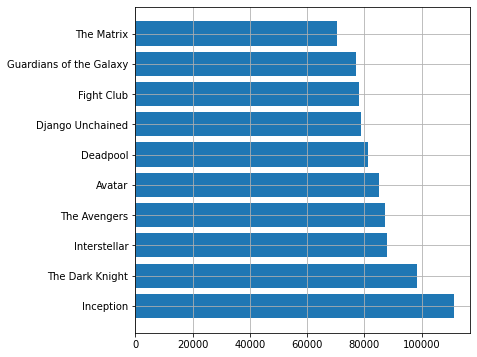

In [ ]:
df["sum_vote"] = df["vote_count"] * df["vote_average"]

Voted = pd.DataFrame([df.title,df.sum_vote]).transpose()
Voted["sum_vote"] = Voted.sum_vote.astype(int)
Voted = Voted.nlargest(10,"sum_vote")

plt.barh(Voted.title,Voted.sum_vote)
plt.grid()
plt.show()

This parts is to show see the highest 10 movies in different features which is budget, revenue, profit and popularity.

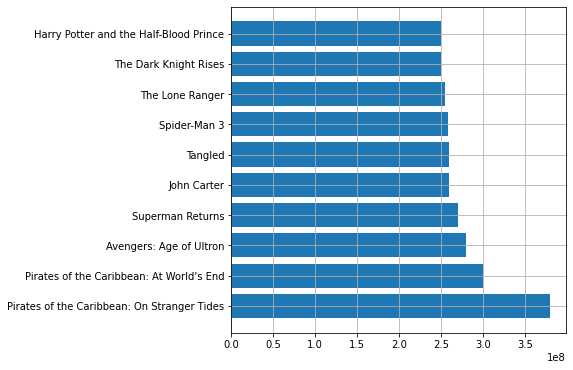

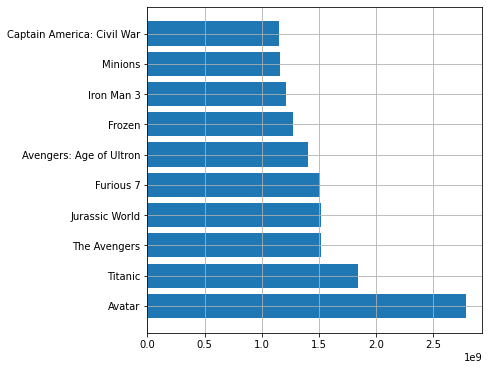

In [ ]:
Budget = pd.DataFrame([df.title,df.budget]).transpose()
Budget["budget"] = Budget.budget.astype(int)
Budget = Budget.nlargest(10,"budget")

plt.barh(Budget.title,Budget.budget)
plt.grid()
plt.show()


Revenue = pd.DataFrame([df.title,df.revenue]).transpose()
Revenue["revenue"] = Revenue.revenue.astype(int)
Revenue = Revenue.nlargest(10,"revenue")

plt.barh(Revenue.title,Revenue.revenue)
plt.grid()
plt.show()

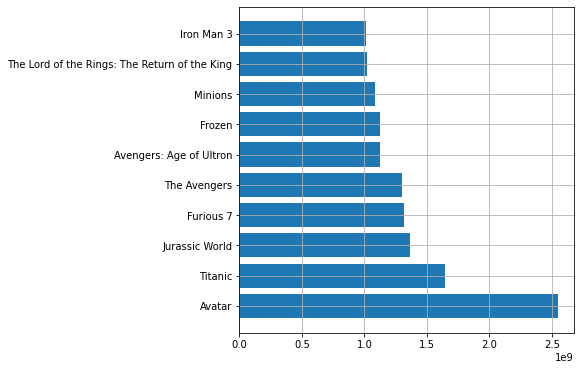

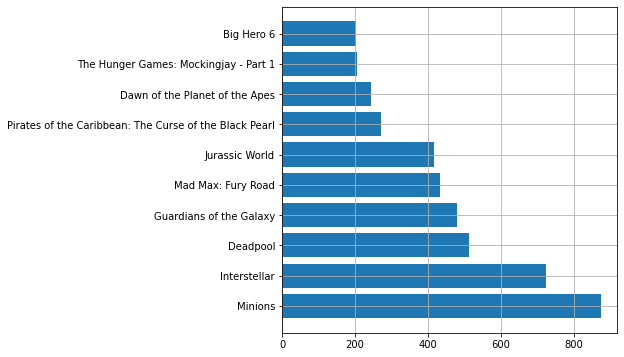

In [ ]:
top_grossing = pd.DataFrame([df.title,df.profit]).transpose()
top_grossing["profit"] = top_grossing.profit.astype(int)
top_grossing = top_grossing.nlargest(10,"profit")

plt.barh(top_grossing.title,top_grossing.profit)
plt.grid()
plt.show()


Popular = pd.DataFrame([df.title,df.popularity]).transpose()
Popular["popularity"] = Popular.popularity.astype(int)
Popular = Popular.nlargest(10,"popularity")

plt.barh(Popular.title,Popular.popularity)
plt.grid()
plt.show()

  One other important part of our project to determine genres of the movies. It is a difficult part to code hence even if genre column looks like a dictionary it is written as a string. So the very frst thing to convert this string into dictionary. After we converted those data into dictionaries we determined how many unique genre are there. There are 20 different movie genres.

In [ ]:
import ast

genres = []

for i in range (len(df["genres"])):
  x = ast.literal_eval(df["genres"][i])
  for j in range (len(x)):
    y = x[j]["name"]
    genres.append(y)
genres_set = set(genres) 
unique_genres = (list(genres_set))
unique_genres


['Science Fiction',
 'Crime',
 'Foreign',
 'TV Movie',
 'Western',
 'Documentary',
 'Action',
 'War',
 'Mystery',
 'Drama',
 'Romance',
 'History',
 'Fantasy',
 'Family',
 'Thriller',
 'Music',
 'Horror',
 'Animation',
 'Comedy',
 'Adventure']

There are several more analysis which we are planning to do to help us to gain more knowledge about our dataset. Hence the main aim of our problem to understand how much popularity a movie needs to have profit from that movie. To have more knowledge about this dataset we are planning to analyze and print some charts to help us.

One of those analyze is to see genres which produces most profit. By this way we can easily observe that the most profitable genres and we can evaluate a movies profit according to movies in same genre. After we calculated the mean profit of all unique genres we can use barh plot to see the difference between those genres.

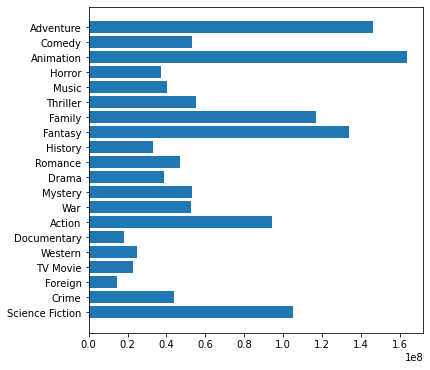

In [ ]:
list_profit = []

for element in unique_genres:
  sumOf = 0
  howMany = 0
  for index,row in df.iterrows():
        if (row.genres.find(element) != -1):
                sumOf+=row.profit
                howMany+=1
                avg = sumOf/howMany

  list_profit.append([element,avg])
  
profitdf = pd.DataFrame(list_profit, columns = ["Genres","Profit"])

x = profitdf["Genres"]
y = profitdf["Profit"]

plt.barh(x,y)
plt.show()

After we evaluated profit relationship, It is time to see compare popularities of genres. By using same algorithm we used in profit-genre relationship we can find out relationship of popularity-genre relation .By the results we see, we can can compare mean popularity and mean profit of genres. For example as can be seen in graphics even if genres as Comedy, War, Western genres does not has many profit as Action movies, they are more close to Action movies in popularity part.

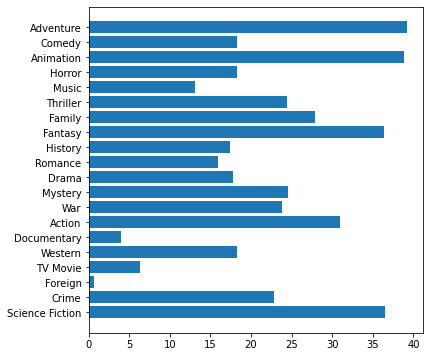

In [ ]:
list_popularity = []

for element in unique_genres:
  sumOf = 0
  howMany = 0
  for index,row in df.iterrows():
        if (row.genres.find(element) != -1):
                sumOf+=row.popularity
                howMany+=1
                avg = sumOf/howMany

  list_popularity.append([element,avg])
  
popularitydf = pd.DataFrame(list_popularity, columns = ["Genres","Popularity"])

x = popularitydf["Genres"]
y = popularitydf["Popularity"]

plt.barh(x,y)
plt.show()

  The main purpose o this cell to add a new column which includes name of genres which movie in that row has. Hence it is way more difficult to work with a string data which looks like a dictionary, we made a genre list from that genre column. It significantly helps us to use those data by indexing that particular dataframe cell.

In [ ]:
newgenre = []

for i in range (len(df["genres"])):
  a = (ast.literal_eval(df["genres"][i]))
  listgenre = []

  for j in range (len(a)):
    indx = a[j]["name"]
    listgenre.append(indx)

  newgenre.append(listgenre)  

df["newgenre"] = newgenre
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,year,profit,sum_vote,newgenre
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009,2550965087,84960.0,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007,661000000,31050.0,"[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015,635674609,28135.8,"[Action, Adventure, Crime]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012,834939099,69205.6,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012,24139100,12956.4,"[Action, Adventure, Science Fiction]"



  This part is one of the most important part that we are going to use in machine learning part of our project. By the using “newgenre”  column that we iterated in the cell before, we check every rows of “newgenre” data if there are any genre that we are looking for. For example by using this algorithm we can detect all Action movies. After that we create a new dataframe for that unique genre. In machine learning part we can use that specific dataframe to work on comedy movies etc.


In [ ]:
new_rows = []


for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Action"):
        newrow = row
        new_rows.append(newrow)
        ActionDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        ActionDF =  ActionDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
        
ActionDF

,budget,popularity,revenue,profit,sum_vote,year,original_language
0,237000000,150.437577,2787965087,2550965087,84960.0,2009,en
1,300000000,139.082615,961000000,661000000,31050.0,2007,en
2,245000000,107.376788,880674609,635674609,28135.8,2015,en
3,250000000,112.312950,1084939099,834939099,69205.6,2012,en
4,260000000,43.926995,284139100,24139100,12956.4,2012,en
...,...,...,...,...,...,...,...
1149,20000000,0.053755,36642838,16642838,5.0,2013,en
1150,20000000,0.003582,36642838,16642838,0.0,2007,en
1151,31192,1.330379,10000,-21192,163.8,2009,en
1152,20000000,7.101197,36642838,16642838,786.0,2009,en


After this part we are going to use ActionDF to test our machine learning model. Hence all other genre data frames work same as ActionDF, it would show us that our machine learning model works or not. In case you would like to see results of each genres it would be enough to run the genre DF cell and change the name in the machine learning model for that specific cell.

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Horror"):
        newrow = row
        new_rows.append(newrow)
        HorrorDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        HorrorDF =  HorrorDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
HorrorDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "History"):
        newrow = row
        new_rows.append(newrow)
        HistoryDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        HistoryDF =  HistoryDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
HistoryDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Drama"):
        newrow = row
        new_rows.append(newrow)
        DramaDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        DramaDF =  DramaDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
DramaDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Documentary"):
        newrow = row
        new_rows.append(newrow)
        DocuDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        DocuDF =  DocuDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
DocuDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Music"):
        newrow = row
        new_rows.append(newrow)
        MusicDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        MusicDF =  MusicDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
MusicDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Romance"):
        newrow = row
        new_rows.append(newrow)
        RomanceDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        RomanceDF =  RomanceDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
RomanceDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Family"):
        newrow = row
        new_rows.append(newrow)
        FamilyDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        FamilyDF =  FamilyDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
FamilyDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Foreign"):
        newrow = row
        new_rows.append(newrow)
        ForeignDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        ForeignDF =  ForeignDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]

ForeignDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Adventure"):
        newrow = row
        new_rows.append(newrow)
        AdventureDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        AdventureDF =  AdventureDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]


AdventureDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Mystery"):
        newrow = row
        new_rows.append(newrow)
        MysteryDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        MysteryDF =  MysteryDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]

MysteryDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Thriller"):
        newrow = row
        new_rows.append(newrow)
        ThrillerDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        ThrillerDF =  ThrillerDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]

ThrillerDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Crime"):
        newrow = row
        new_rows.append(newrow)
        CrimeDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        CrimeDF =  CrimeDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
CrimeDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Fantasy"):
        newrow = row
        new_rows.append(newrow)
        FantasyDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        FantasyDF =  FantasyDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
FantasyDF


In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "War"):
        newrow = row
        new_rows.append(newrow)
        WarDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        WarDF =  WarDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
WarDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Western"):
        newrow = row
        new_rows.append(newrow)
        WesternDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        WesternDF =  WesternDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
WesternDF


In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Comedy"):
        newrow = row
        new_rows.append(newrow)
        ComedyDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        ComedyDF =  ComedyDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
ComedyDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Animation"):
        newrow = row
        new_rows.append(newrow)
        AnimeDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        AnimeDF =  AnimeDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
AnimeDF

In [ ]:
new_rows.clear()
for index,row in df.iterrows():
  for k in row.newgenre: 
      if (k == "Science Fiction"):
        newrow = row
        new_rows.append(newrow)
        SciFiDF = pd.DataFrame(new_rows, columns=df.columns).reset_index()
        SciFiDF =  SciFiDF[["budget", "popularity", "revenue", "profit", "sum_vote", "year", "original_language"]]
SciFiDF

## Machine Learning Models


The first model we're going to implement is Linear Regression. To increase the accuracy from 0.67 to 0.79, first, we are going to One-Hot Encode the original_language column. We use budget, popularity, sum_vote which we created above and original_language as indicators for the profit a movie makes. 

In [ ]:
#One-Hot encoding original_language
ActionDF = ActionDF.join(pd.get_dummies(ActionDF.original_language, prefix='og'))
ActionDF


,budget,popularity,revenue,profit,sum_vote,year,original_language,og_cn,og_de,og_en,...,og_ja,og_ko,og_ky,og_pt,og_ru,og_sv,og_te,og_th,og_tr,og_zh
0,237000000,150.437577,2787965087,2550965087,84960.0,2009,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,300000000,139.082615,961000000,661000000,31050.0,2007,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,245000000,107.376788,880674609,635674609,28135.8,2015,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,250000000,112.312950,1084939099,834939099,69205.6,2012,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,260000000,43.926995,284139100,24139100,12956.4,2012,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1149,20000000,0.053755,36642838,16642838,5.0,2013,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1150,20000000,0.003582,36642838,16642838,0.0,2007,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1151,31192,1.330379,10000,-21192,163.8,2009,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1152,20000000,7.101197,36642838,16642838,786.0,2009,en,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
import sklearn.metrics as sm
def metrics(y_test,y_pred):
  print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
  print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
  print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
  print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
  print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math

#the addition of original_language does not change the R2 score at all
X = ActionDF[["budget", "popularity", "year", "sum_vote", "og_cn",	"og_de",	"og_en",	"og_es",	"og_fr",	"og_hi",	"og_id",	"og_it",	"og_ja",	"og_ko",	"og_ky",	"og_pt",	"og_ru",	"og_sv",	"og_te",	"og_th",	"og_tr",	"og_zh"]].values
y = ActionDF["revenue"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#Create an object called regressor in the LinearRegression class…
regressor = LinearRegression()
#Fit the linear regression model to the training set… We use the fit #method the arguments of the fit method will be training sets
regressor.fit(X_train,y_train)
# Predicting the Test set results:
y_pred= regressor.predict(X_test)
metrics(y_test,y_pred)

Mean absolute error = 64301907.56
Mean squared error = 1.066673256820443e+16
Median absolute error = 42204292.04
Explain variance score = 0.81
R2 score = 0.81


In linear regression the numbers given directly to inside. We can do it by two regression models. Lasso and Ridge. Both of them normalise the numbers and gives number as normalized.In Ridge there is a hyper parameter named alfa. When we determined alfa as 1 we took 0.72 score. When we give smaller values to alfa hyperparameter our score increase to 0.73. Also we tried the elasticnet regression model which is a composite version of Ridge and Lasso. It also gives 0.73 score. The last model we tried is Random Forest Regressor which gives smaller score but also smaller eror than the other two models

In [ ]:
lasso = Lasso(alpha=0.00000001,normalize=True,max_iter=100)
lasso.fit(X_train,y_train)
metrics(y_test,lasso.predict(X_test))

Mean absolute error = 64302202.55
Mean squared error = 1.0666748639150164e+16
Median absolute error = 42204292.04
Explain variance score = 0.81
R2 score = 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.268e+17, tolerance: 4.

In [ ]:
ridge = Ridge(alpha=1,normalize=True)
ridge.fit(X_train,y_train)
metrics(y_test,ridge.predict(X_test))

Mean absolute error = 69126355.19
Mean squared error = 1.3374366322169762e+16
Median absolute error = 41409006.37
Explain variance score = 0.76
R2 score = 0.76


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
ridge = Ridge(alpha=0.0000001,normalize=True)
ridge.fit(X_train,y_train)
metrics(y_test,ridge.predict(X_test))

Mean absolute error = 64330044.82
Mean squared error = 1.066844498946907e+16
Median absolute error = 42204283.58
Explain variance score = 0.81
R2 score = 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [ ]:
elasticnet = ElasticNet(alpha=0.00000001,normalize=True)
elasticnet.fit(X_train,y_train)
metrics(y_test,elasticnet.predict(X_test))

Mean absolute error = 64302350.62
Mean squared error = 1.066668840269934e+16
Median absolute error = 42203902.48
Explain variance score = 0.81
R2 score = 0.81


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increas

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
metrics(y_test,rfr.predict(X_test))

Mean absolute error = 55674059.37
Mean squared error = 1.2650913987770852e+16
Median absolute error = 22548426.92
Explain variance score = 0.78
R2 score = 0.78


KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from statistics import mean, stdev
import math

# k values
kVals = [5,10,15,20,25,30,45,50]

# Save the accuracies of each value of kVal in [accuracies] variable
accuracies = []
std=[]

X = ActionDF[["budget", "popularity", "revenue", "profit", "year"]].values
y = ActionDF[["revenue"]].values
y=y.squeeze()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =90)

#scaling features
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

for k in kVals:

#define model : Init K-NN
  classifier = KNeighborsClassifier(n_neighbors= k, metric = 'euclidean')
  classifier.fit(X_train, y_train)

  scores =  cross_val_score(classifier,X_train, y_train,cv=5)
  accuracies.append(mean(scores)) 
  std.append(stdev(scores))

y_pred = classifier.predict(X_test)





In [ ]:

import sklearn.metrics as sm

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))
print("accuracy score =",accuracy_score(y_test, y_pred))

print("accuracy scores of train datas when n_neighbors={5,10,15,20,25,30,45,50} =",accuracies)



Mean absolute error = 88669601.04
Mean squared error = 3.971452554179386e+16
Median absolute error = 33540288.0
Explain variance score = 0.53
R2 score = 0.44
accuracy score = 0.2077922077922078
accuracy scores of train datas when n_neighbors={5,10,15,20,25,30,45,50} = [0.15927144535840188, 0.1657755581668625, 0.16901880141010575, 0.17551703877790834, 0.17659811985898943, 0.17659811985898943, 0.1776792009400705, 0.17876615746180963]


### Results & Discussion


KNN is a machine learning algorithm that works on a principle that assumes that every data point falling close to each other falls into the same class, and in this use, it classifies by looking at the closest 50 neighbors. The results we got from the use of the KNN algorithm on data in the action movies category showed that the mean absolute error  is 88774435.8, the mean squared error  is 3.973743904341049e + 16, the median absolute error  is 33540288.0, the explain variance score  is 0.53, and the accuracy score is 0.44.The accuracy value of the KNN algorithm is less than the expectations, it needs cross validation to find the optimal k value, and therefore the code run time is getting long.

We were pretty sure from the start thatlinear regression was going to be the most accurate method, among the ones we have learned. Regression searches for relationships among variables, and since finding how several variables are related is our goal, we knew that's what we had to do.

We wanted to observe how genre, budget, popularity, language and votes affected the profit, and if it could be predicted. But rather than one-hot encoding the genres, like we did to original_language, we seperated the data using genres. If you wanted to predict an action movie, there is a specific dataframe you should use, that is created above, and this goes for all 20 genres.

Linear Regression yielded the predictions like we knew it would, in some cases, having an R2 score of 0.82 which is the best we have seen, even though it usually ranges from 0.65 to 0.80. An example of the possible mean errors, variance scores and R2s are demonstrated above.

## Conclusion


As a conclusion by the help of our machine learning model we can see that our dataset is applicable. By using linear regression we are able to compute and make assumptions by our machine learning model. As you can see above we have tried many different types of machine learning models even if we were able to run them regression model have provided us better solution. Even if by this dataset we are able to build a machine learning model, this models are the highest accuracies we can take. As we have mentioned in previous parts that the concerns about the correctness of our dataset, without updating the dataset to better version this results are the best we can ever have.

## Future Work



While creating prediction, multiple regression was used. But prediction is higher than expected prediction due to a problem we could not identify. 2 different ways can be followed to prevent this error; one of the ways is to identify and solve the problem while multiple regression used or using another machine learning algorithm might solve that error. 

As we mentioned in earlier stages of our project, our dataset has many NA values even if those data are not NA. If we would update those values in our dataset we believe that our machine learning model can give us better solutions and by this way we can be more sure about the correctness of our dataset. 

## Work Division



While doing the project, all group members worked together. With meetings held occasionally, the codes that everyone wrote during the day were evaluated and the most efficient ones were selected and added to the project. Instead of dividing all parts of the project, all members worked together in harmony, as we thought that it would be more beneficial for all members in the group to produce a solution in terms of better learning.